# Keras

In [1]:
# conda install -c anaconda keras # to install keras on cpu

In [2]:
#conda uninstall -y tensorflow

In [1]:
#conda install tensorflow

In [2]:
#conda uninstall -y keras

In [2]:
#conda install -c anaconda keras

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation

In [3]:
image_size = 32
num_channels = 3 #RGB
num_features = image_size * image_size * num_channels
num_classes = 10
num_train = 49000

## Load Cifar-10 Dataset

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Train data shape: {}'.format(x_train.shape)) 
print('Test data shape: {}'.format(x_test.shape)) 

Train data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


### Enumerate

In [5]:
my_list = ['apple', 'banana', 'grapes', 'pear']
for counter, value in enumerate(my_list):
    print (counter, value)

0 apple
1 banana
2 grapes
3 pear


## Data Visualization

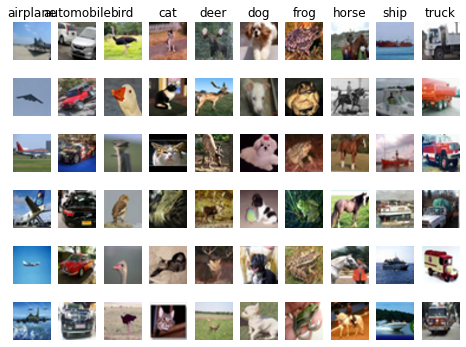

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 6

plt.figure(figsize=(8, 6))

for cls, name in enumerate(class_names):
    idxs = np.flatnonzero(y_train == cls)
    idxs = np.random.choice(idxs, samples_per_class, replace= False)
    for i, idxs in enumerate(idxs):
        plt.subplot(samples_per_class, num_classes, i * num_classes + cls + 1)
        plt.imshow(x_train[idxs], interpolation='spline16')
        plt.axis('off')
        if i == 0:
            plt.title(class_names[cls])

## Data Processing

In [7]:
# convert 4D arrays to 2D arrays
x_train = x_train.reshape([-1, num_features])
x_test  =  x_test.reshape([-1, num_features])

print('Train data shape: {}'.format(x_train.shape)) 
print('Test data shape: {}'.format(x_test.shape)) 
print(y_train.shape)

Train data shape: (50000, 3072)
Test data shape: (10000, 3072)
(50000, 1)


In [8]:
# convert pixel range from [0, 255] to [0. , 1.]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mu = np.mean(x_train, axis=0)

x_train -=mu
x_train /= 255

x_test -= mu
x_test /=255

## One-hot encoding

In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


## Linear Classifier

In [10]:
model = Sequential()
model.add(Dense(num_classes, input_shape=(num_features,), activation='softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [12]:
model.compile(optimizer='sgd',  loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(x_train[:num_train], y_train[:num_train], 
                    batch_size=512, 
                    epochs=15,
                    verbose=2,
                    validation_data=(x_train[num_train:], y_train[num_train:]),
                    shuffle=True)

Train on 49000 samples, validate on 1000 samples
Epoch 1/15
 - 1s - loss: 2.1186 - accuracy: 0.2380 - val_loss: 2.0221 - val_accuracy: 0.3070
Epoch 2/15
 - 1s - loss: 1.9781 - accuracy: 0.3101 - val_loss: 1.9530 - val_accuracy: 0.3450
Epoch 3/15
 - 1s - loss: 1.9251 - accuracy: 0.3350 - val_loss: 1.9155 - val_accuracy: 0.3480
Epoch 4/15
 - 0s - loss: 1.8929 - accuracy: 0.3490 - val_loss: 1.8898 - val_accuracy: 0.3570
Epoch 5/15
 - 0s - loss: 1.8707 - accuracy: 0.3566 - val_loss: 1.8718 - val_accuracy: 0.3670
Epoch 6/15
 - 1s - loss: 1.8538 - accuracy: 0.3626 - val_loss: 1.8578 - val_accuracy: 0.3740
Epoch 7/15
 - 1s - loss: 1.8404 - accuracy: 0.3681 - val_loss: 1.8469 - val_accuracy: 0.3800
Epoch 8/15
 - 1s - loss: 1.8295 - accuracy: 0.3731 - val_loss: 1.8388 - val_accuracy: 0.3860
Epoch 9/15
 - 1s - loss: 1.8202 - accuracy: 0.3759 - val_loss: 1.8309 - val_accuracy: 0.3810
Epoch 10/15
 - 1s - loss: 1.8122 - accuracy: 0.3797 - val_loss: 1.8236 - val_accuracy: 0.3870
Epoch 11/15
 - 0s - 

In [33]:
keras.__version__ 

'2.3.1'

In [34]:
from tensorflow.python.keras.optimizers import TFOptimizer

In [35]:
'''model.save('Linear-model.h5')'''

"model.save('Linear-model.h5')"